# <center><font color="green"> https://bit.ly/ptpjb-2021-09</font><br><font color="blue">09 - Time Series Analysis - (S)Arima</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> 09 - Time Series Analysis - (S)Arima</font></center>

* Pendahuluan Time Series Analysis
* Stasioneritas & Autokorelasi Arima
* Parameter & Spesifikasi Model Arima
* Sarima - Seasonality
* Studi kasus Arima & Sarima

<img src="images/time series.png" style="height: 200px;"/>

image source: https://medium.com/@paradistia/analisis-runtun-waktu-peramalan-fuzzy-time-series-cheng-menggunakan-microsoft-excel-b33a192013bb

# <center><font color="blue">Data Bergantung Waktu</font></center>

* Beberapa data tertentu bergantung terhadap waktu, sebut saja pergerakan nilai mata uang (kurs)/harga saham, suhu/temperature udara di suatu daerah tertentu, atau data logs suatu website. 
* Saat nilai data di masa depan lebih banyak (dominan) hanya dipengaruhi dari nilai-nilainya di masa lalu, maka model-model runtun waktu univariate(satu peubah/variabel) seperti ARIMA (Autoregressive Integrated Moving Average) dapat digunakan. 
* Namun bila satu atau beberapa peubah yang bergantung waktu dipengaruhi juga oleh variable lain selain nilai-nilainya di masa lalu, maka model runtun waktu peubah ganda (multivariate) seperti VaR (Vector autoRegression) dapat digunakan. 

<img src="images/Time_Series_Data.png" style="height: 300px;"/>

# <center><font color="blue">Komponen Data Time Series</font></center>

Pola dari data time series dapat dibagi menjadi komponen-komponen berikut:
1. **Base atau Level**. Data time series yang diobservasi.
2. **Trend**. Kemiringan meningkat atau menurun yang terlihat di Time Series.
3. **Seasonality**. Pola unik yang terlihat di suatu interval waktu karena faktor musiman. Hal ini bisa karena suatu bulan di setiap tahunnya, suatu hari di setiap bulannya, atau bahkan suatu jam di dalam satu hari.
4. **Residual atau Noise atau Error**. Variasi dari data yang tidak dapat dijelaskan.

* Sebagai catatan, tidak semua data Time Series memiliki seluruh komponen diatas. Time Series akan selalu memiliki Base, rata-rata memiliki Residual, dan Trend dan Seasonality biasanya tidak harus ada.

<img src="images/time series decomposition trend seasonal.jpeg" style="height: 350px;"/>

# <center><font color="blue">ARIMA (Autoregressive Integrated Moving Average)</font></center>

Model ARIMA merupakan model statistik untuk menganalisis dan meramalkan data time series.

ARIMA adalah singkatan dari *AutoRegressive Integrated Moving Average* yang merupakan gabungan dari AutoRegressive dan Moving Average yang lebih sederhana dan menambahkan Integrated.
- **AR** : Autoregression. Adalah model yang menggunakan hubungan ketergantungan antara data saat ini dengan beberapa data di masa lalu.
- **I** : Integrated. Adalah penggunaan diferensiasi pada data observasi untuk membuatnya menjadi stasioner.
- **MA** : Moving Average. Adalah model yang menggunakan hubungan ketergantungan antara data saat ini dengan error dari hasil forecasting di masa lalu

<img src="images/arima_flowchart.jpg" style="height: 250px;"/>

# <center><font color="blue">Stasionaritas</font></center>

Data time series yang stasioner adalah data yang sifatnya tidak bergantung pada waktu. Oleh karena itu, deret waktu dengan tren, atau dengan musim, tidak stasioner. Metode ARIMA mengasumsikan bahwa data time series bersifat stasioner.

<img src="images/arima-time-series-stationarity.png" style="height: 350px;"/>

# <center><font color="blue">Parameter p, d, q di ARIMA</font></center>

Masing-masing komponen ini secara eksplisit ditentukan dalam model sebagai parameter **p, d, dan q**. biasanya model arima dinotasikan **ARIMA(p,d,q)**. masing-masing paramater tersebut didefinisikan sebagai berikut:
- p: orde untuk proses autoregressive (AR).
- d: orde yang menyatakan banyaknya proses diferensiasi yang dilakukan pada data time series yang tidak stasioner.
- q: orde yang menyatakan proses moving average (MA).

<img src="images/Arima_Model.png" style="height: 250px;"/>

# <center><font color="blue">Spesifikasi Model: ACF - PACF</font></center>

<img src="images/time series formula acf pacf.png" style="height: 200px;"/>
<img src="images/acf-pacf-arima-graph.png" style="height: 250px;"/>

# <center><font color="blue">Parameter p & q</font></center>

* Menentukan p dan q berdasarkan pola ACF dan PACF

<img src="images/pola ACF PACF.jpg"  style="height: 300px;"/>

# <center><font color="blue">Pemilihan Model Berdasarkan Pola ACF dan PACF</font></center>

<img src="images/pola-acf-pacf.png" style="height: 250px;"/>

# <center><font color="blue">Pemilihan Model Berdasarkan Pola ACF dan PACF</font></center>

<img src="images/Diagnostic_model_arima.png" style="height: 400px;"/>

# <center><font color="blue">Variasi Arima</font></center>

ARIMA memiliki beberapa variasi di antaranya adalah:

- **ARIMA**: ARIMA dasar yang tidak dapat digunakan pada data musiman
- **Seasonal ARIMA (SARIMA)**: digunakan untuk meramalkan data berpola musiman
- **Seasonal ARIMA with eXogenous (SARIMAX)**:  digunakan untuk meramalkan data berpola musiman dengan beberapa variabel independen yang mempengaruhinya.

<img src="images/sarima.png" style="height: 100px;"/><img src="images/sarima_equation.png" style="height: 200px;"/>

# <center><font color="blue">Time Series Analysis in Python</font></center>

* Contoh kasus **Arima**: Data Penumpang Pesawat https://www.kaggle.com/rakannimer/air-passengers
* Contoh kasus **Sarima**: Produksi Energy Listrik & gas  https://fred.stlouisfed.org/series/IPG2211A2N

<img src="images/arima in python.jpg" style="height: 200px;"/>

In [ ]:
!pip install pmdarima chart_studio plotly statsmodels
# menginstall module yang dibutuhkan

In [44]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np, pandas as pd, pmdarima
import matplotlib.pyplot as plt, seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl
import cufflinks as cf; cf.go_offline(); init_notebook_mode(connected=True)
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

sns.set(style="ticks", color_codes=True)
random_state = 99
"Done"

'Done'

# <center><font color="blue"> Contoh Kasus Data Penumpang Pesawat </font></center>

* Permasalahan: International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
* Sumber Data https://www.kaggle.com/rakannimer/air-passengers
* Kernel: https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

<img src="images/ilustrasi_arima_passenger_prediction.jpg" style="height: 250px;"/>

In [60]:
# Loading Data menggunakan waktu sebagai index sebagaimana yang sudah di contohkan di module sebelumnya.

file_ = "data/AirPassengers.csv"
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_, parse_dates=True, index_col = "Month", error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    df = pd.read_csv(file_, parse_dates=True, index_col = "Month", error_bad_lines=False, low_memory = False, encoding='utf8')

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print(df.info())
df.head()

baris =  144 , Kolom (jumlah variabel) =  1
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [65]:
df.describe(include="all"), min(df.index), max(df.index)

(       Passengers
 count  144.000000
 mean   280.298611
 std    119.966317
 min    104.000000
 25%    180.000000
 50%    265.500000
 75%    360.500000
 max    622.000000,
 Timestamp('1949-01-01 00:00:00'),
 Timestamp('1960-12-01 00:00:00'))

# <center><font color="blue"> Visualisasi Data </font></center>

In [66]:
p = df.iplot(title="Penumpang Pesawat 1949~1960")
# Nampak jelas adanya Trend

# <center><font color="blue">Stationarity</font></center>

* Before we can build a model, we must ensure that the time series is stationary. There are two primary way to determine whether a given time series is stationary.

* **Rolling Statistics**: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis). Sudah dibahas di Module 04 (Visualisasi).

* **Augmented Dickey-Fuller Test**: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

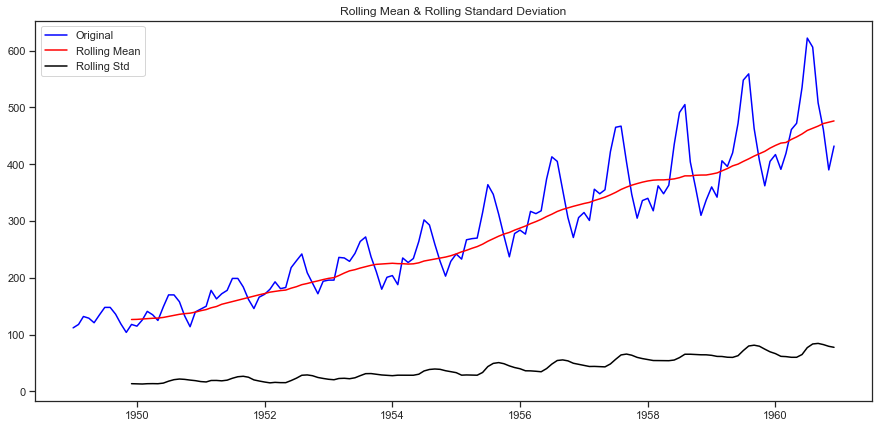

In [67]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

# <center><font color="blue">Rolling Mean & Standard Deviation</font></center>

* the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.
* Bisa juga lewat uji statistik

In [68]:
result = adfuller(df['Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060569
p-value: 0.9918802434376411
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


# <center><font color="blue">ADF Statistic</font></center>

* The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

* Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

* There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean.

In [69]:
def get_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

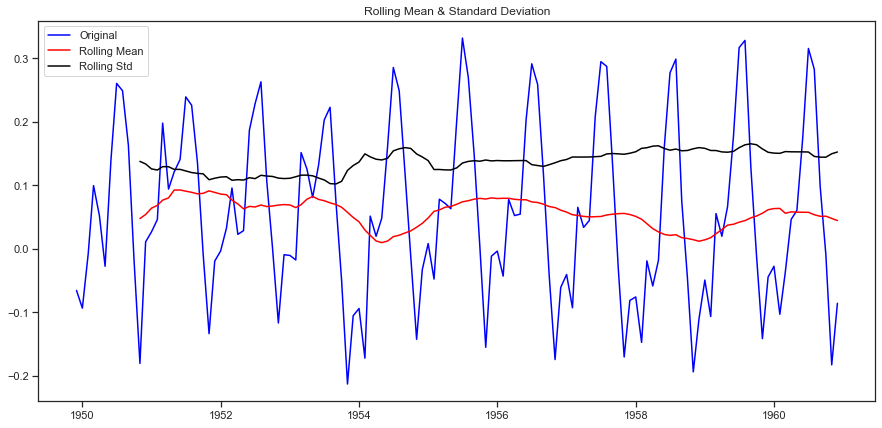

ADF Statistic: -3.162907991300853
p-value: 0.022234630001244135
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [71]:
df_log = np.log(df)
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

# <center><font color="blue"> Differencing </font></center>

* The ARIMA (aka Box-Jenkins) model adds differencing to an ARMA model. 
* Differencing subtracts the current value from the previous and can be used to transform a time series into one that’s stationary. 
* For example, first-order differencing addresses linear trends, and employs the transformation zi = yi — yi-1. 
* Second-order differencing addresses quadratic trends and employs a first-order difference of a first-order difference, namely zi = (yi — yi-1) — (yi-1 — yi-2), and so on.

<img src="images/arima-differencing.png" style="height: 250px;"/>

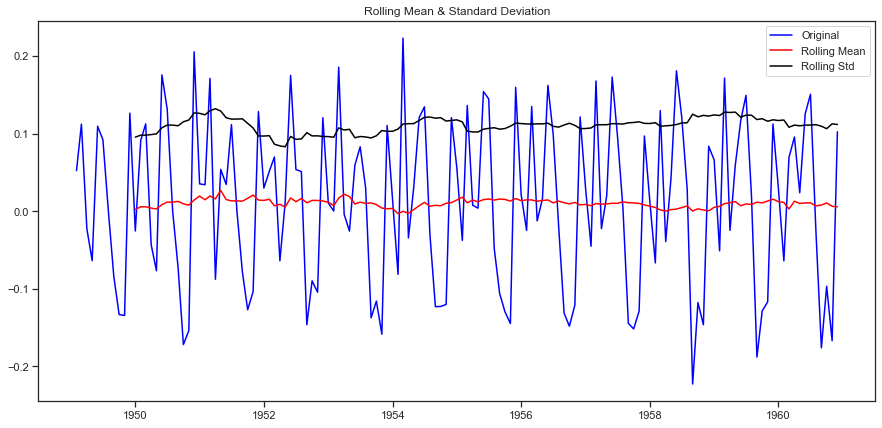

ADF Statistic: -2.7171305983881346
p-value: 0.07112054815085846
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [73]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

Time shifting performed worse than subtracting the rolling mean. However, it is still **more stationary** than the original.

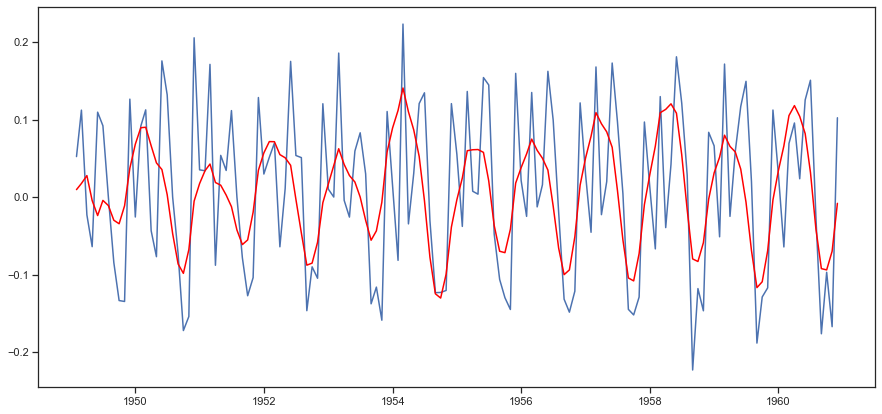

In [75]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
plt.show()

Then, we can see how the model compares to the original time series.

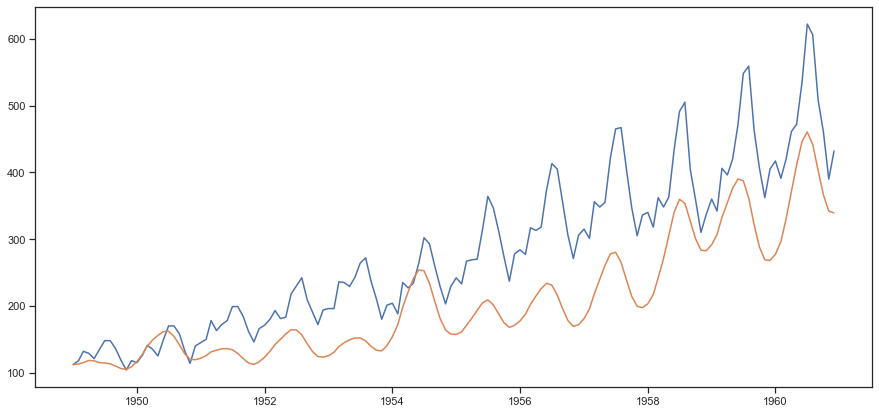

In [77]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.show()

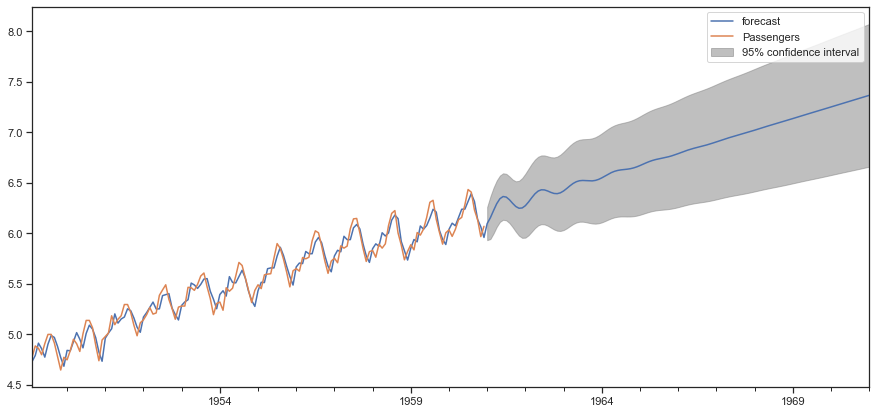

In [80]:
"""
Given that we have data going for every month going back 12 years
and want to forecast the number of passengers for the next 10 years, 
we use (12 x12)+ (12 x 10) = 264
"""
results.plot_predict(1,264)
plt.show()

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 26 Aug 2021   AIC                           -287.281
Time:                        23:33:21   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.Passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.Passengers    -0.8946      0.039    -23.127      0.000      -0.970      -0.819
ma.L1.D.Passengers    -1.8270      0.036    -51.303      0.000      -1.897      -1.757
ma.L2.D.Passengers     0.9245      0.036     25.568      0.000       0.854       0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9106           -0.5372j            1.0573           -0.0848
AR.2            0.9106           +0.5372j            1.0573            0.0848
MA.1            0.9881           -0.3245j            1.0400           -0.0505
MA.2            0.9881           +0.3245j            1.0400            0.0505
-----------------------------------------------------------------------------
"""

# <center><font color="blue"> Contoh Kasus SARIMA: Data NAICS </font></center>

* Permasalahan: Data bulanan produksi **Listrik dan Gas** sebuah perusahaan di Amerika Serikat dari tahun 1985-2018.
* Sumber Data https://fred.stlouisfed.org/series/IPG2211A2N
* Contoh kasus menggunakan **Auto Arima** untuk memudahkan pemodelan time Series di Python.

<img src="images/data-naics-time-series-energy.png" style="height: 250px;"/>

In [28]:
# Loading Data menggunakan waktu sebagai index sebagaimana yang sudah di contohkan di module sebelumnya.

file_ = "data/IPG2211A2N.csv"
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_, parse_dates=True, index_col = "DATE", error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    df = pd.read_csv(file_, parse_dates=True, index_col = "DATE", error_bad_lines=False, low_memory = False, encoding='utf8')

df.columns = ['Energy-Production'] # Rename Kolom
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print(df.info())
df.head()

baris =  991 , Kolom (jumlah variabel) =  1
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991 entries, 1939-01-01 to 2021-07-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Produksi-Energi  991 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB
None


,Produksi-Energi
DATE,
1939-01-01,3.3298
1939-02-01,3.3552
1939-03-01,3.4315
1939-04-01,3.4569
1939-05-01,3.4569


# <center><font color="blue"> Visualisasi Data </font></center>

In [36]:
# Warning agak lambat
p = df.iplot(title="Energy Production Jan 1985--Jan 2018")

# <center><font color="blue"> Dekomposisi Karena Adanya Trend </font></center>

* Terlihat nampak ada Trend naik.
* Dekomposisi runtun waktu adalah sebuah proses statistik untuk mendekomposisi (deconstruct) sebuah data runtun  

* Here we can see there is an upward trend. We can use statsmodels to perform a decomposition of this time series. The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

* We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 100 units of energy production). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of energy production everyyear).

* Based off the previous chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a bit hard to tell from this one plot, we can always experiment with additive versus multiplicative methods.).

* Again, Python and Statsmodels make this task incredibly easy in just a few lines of code:

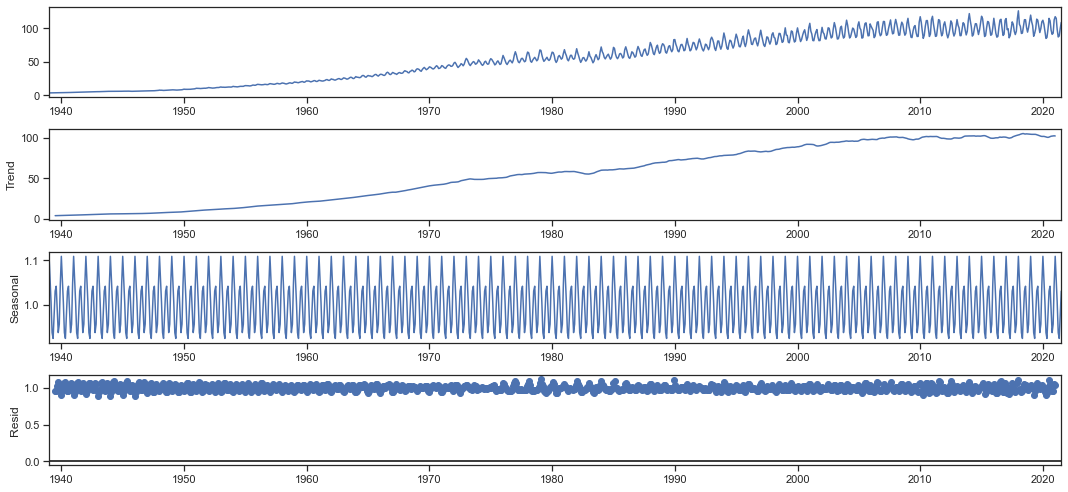

In [41]:
result = seasonal_decompose(df, model="multiplicative")
fig = result.plot()

# <center><font color="blue">Trend and seasonality</font></center>

* From the plot above we can clearly see the seasonal component of the data, and we can also see the separated upward trend of the data.

* Trends can be upward or downward, and can be linear or non-linear. It is important to understand your data set to know whether or not a significant period of time has passed to identify an actual trend.

* Irregular fluctuations are abrupt changes that are random and unpredictable.

# <center><font color="blue">Performing the Seasonal ARIMA</font></center>

* Now that we’ve analyzed the data, we can clearly see we have a time series with a seasonal component, so it make sense to use a Seasonal ARIMA model. In order to do this we will need to choose p,d,q values for the ARIMA, and P,D,Q values for the Seasonal component.

* There are many ways to choose these values statistically, such as looking at auto-correlation plots, correlation plots, domain experience, etc.

* One simple approach is to perform a grid search over multiple values of p,d,q,P,D,and Q using some sort of performance criteria. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.

* The AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

* The pyramid-arima library for Python allows us to quickly perform this grid search and even creates a model object that you can fit to the training data.

* This library contains an auto_arima function that allows us to set a range of p,d,q,P,D,and Q values and then fit models for all the possible combinations. Then the model will keep the combination that reported back the best AIC value.

In [45]:
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3955.407, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4462.678, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4298.114, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4067.830, Time=0.54 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4249.038, Time=0.51 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3950.874, Time=1.46 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4139.841, Time=0.94 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3919.762, Time=4.18 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4015.705, Time=2.49 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3906.521, Time=6.79 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3940.531, Time=6.59 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=4000.775, Time=6.73 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=4047.083, Time=7.01 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3908.490, Time=8.55 sec
 ARIMA(1,1,2)(2,1,2

# <center><font color="blue">Train Test Split</font></center>

* We can then fit the stepwise_model object to a training data set. Because this is a time series forecast, we will “chop off” a portion of our latest data and use that as the test set. Then we will train on the rest of the data and forecast into the future. Afterwards we can compare our forecast with the section of data we chopped off.

* We’ll train on 20 years of data, from the years 1985–2015 and test our forecast on the years after that and compare it to the real data:

In [47]:
train = df.loc['1985-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

# <center><font color="blue">Train the Model</font></center>

* We can then train the model by simply calling .fit on the stepwise model and passing in the training data.

In [48]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [57]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  384
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood                -829.671
Date:                                 Thu, 26 Aug 2021   AIC                           1681.343
Time:                                         22:52:32   BIC                           1724.421
Sample:                                              0   HQIC                          1698.452
                                                 - 384                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8478      0.427     -1.987      0.047      -1.684      -0.012
ar.L2          0.2570      0.176      1.464      0.143      -0.087       0.601
ar.L3          0.1469      0.257      0.570      0.568      -0.358       0.651
ma.L1          0.4625      0.419      1.103      0.270      -0.359       1.284
ma.L2         -0.8802      0.043    -20.333      0.000      -0.965      -0.795
ma.L3         -0.4405      0.389     -1.134      0.257      -1.202       0.321
ar.S.L12       0.6880      0.135      5.094      0.000       0.423       0.953
ar.S.L24      -0.2776      0.062     -4.506      0.000      -0.398      -0.157
ma.S.L12      -1.4414      0.132    -10.920      0.000      -1.700      -1.183
ma.S.L24       0.6340      0.107      5.934      0.000       0.425       0.843
sigma2         4.8880      0.310     15.754      0.000       4.280       5.496
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                22.67
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# <center><font color="blue">Evaluasi</font></center>

* Now that the model has been fitted to the training data, we can forecast into the future. 
* Recall that our test data set is from 2015–01–01 all the way to 2018–01–01. 

In [84]:
future_forecast = stepwise_model.predict(n_periods=55)
# This returns an array of predictions:
print(future_forecast)

[119.99984628 107.71811085  97.89530845  88.42898941  90.02998747
 101.67865096 111.42710057 110.60536852  98.8309132   90.1207644
  94.03776442 109.90164672 118.72250842 108.63946567  99.60724861
  88.64174158  90.44274405 101.43683105 110.96372361 109.53884942
  98.99016603  90.42251505  94.90436696 108.25015186 118.62225693
 109.18886704  99.87030809  88.65091058  90.38525361 101.51126097
 111.06834096 109.84931564  99.74562082  90.61261512  94.83314481
 107.92223051 119.02384346 109.45789686  99.69332787  88.74361613
  90.34960202 101.77385152 111.38855982 110.50213789 100.34181933
  90.80181307  94.665186   108.29632283 119.45043424 109.63091519
  99.62180611  88.94452836  90.46502047 102.07283628 111.70447978]


# <center><font color="blue">Visualisasikan Prediksi</font></center>

In [85]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

# <center><font color="blue">Membandingkan dengan Seluruh Data</font></center>

In [56]:
pd.concat([df,future_forecast],axis=1).iplot()

# <center><font color="blue"> Akhir Modul 09 - Time Series Analysis - (S)Arima</font></center>

<hr />
<img alt="" src="images/meme-cartoon/TimeSeries_MeMe.jpg" style="height: 300px;"/>